# Convolutional Neural Network [ Evalutaion - 03 ]

## NAME - AKHILESH JOSHI
## DIVISION - B
## ROLL NO- 03
## SRN - 0FE22BCS013


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define paths and parameters
data_dir = r'C:\anaconda3\archive (2)\flowers'
IMG_SIZE = (150, 150)
BATCH_SIZE = 32


In [4]:
# Normalize pixel values and split the data
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

# Training data generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation data generator
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Extract class labels
class_labels = train_generator.class_indices
print("Class labels:", class_labels)


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.
Class labels: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_labels), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


C:\anaconda3\anacondamain\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,997 (18.42 MB)

 Trainable params: 4,828,997 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping]
)


C:\anaconda3\anacondamain\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 102s 910ms/step - accuracy: 0.3556 - loss: 1.5046 - val_accuracy: 0.5942 - val_loss: 1.0333
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 49s 447ms/step - accuracy: 0.6139 - loss: 0.9929 - val_accuracy: 0.6314 - val_loss: 0.9598
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 46s 421ms/step - accuracy: 0.6817 - loss: 0.8034 - val_accuracy: 0.6384 - val_loss: 0.9180
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 44s 399ms/step - accuracy: 0.7538 - loss: 0.6476 - val_accuracy: 0.6535 - val_loss: 0.9250
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 43s 398ms/step - accuracy: 0.8346 - loss: 0.4465 - val_accuracy: 0.6372 - val_loss: 1.0300
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 43s 397ms/step - accuracy: 0.9172 - loss: 0.2522 - val_accuracy: 0.6500 - val_loss: 1.2591
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 44s 402ms/step - accuracy: 0.9618 - loss: 0.1314 - val_accuracy: 0.6140 - val_loss: 1.6188
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 43s 394ms/step - accuracy: 0.9720 - loss: 

In [7]:
# Evaluate on validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Generate a classification report
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred_classes = tf.argmax(y_pred, axis=1)
print(classification_report(y_true, y_pred_classes, target_names=class_labels.keys()))


27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.6212 - loss: 0.9166
Validation Loss: 0.9180175065994263
Validation Accuracy: 0.6383720636367798
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step
              precision    recall  f1-score   support

       daisy       0.12      0.12      0.12       152
   dandelion       0.20      0.19      0.19       210
        rose       0.16      0.12      0.14       156
   sunflower       0.16      0.21      0.19       146
       tulip       0.18      0.18      0.18       196

    accuracy                           0.17       860
   macro avg       0.17      0.17      0.16       860
weighted avg       0.17      0.17      0.17       860



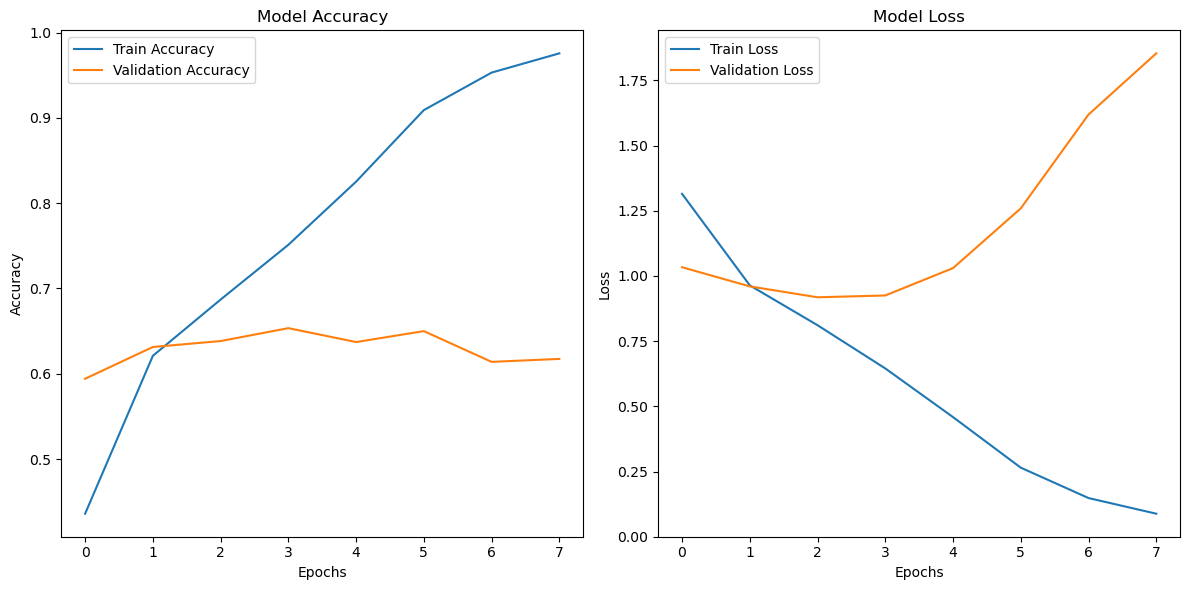

In [8]:
# Plot training and validation loss/accuracy
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:

test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset=None,  
    shuffle=False  
)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 4317 images belonging to 5 classes.


C:\anaconda3\anacondamain\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


135/135 ━━━━━━━━━━━━━━━━━━━━ 69s 510ms/step - accuracy: 0.7479 - loss: 0.6900
Test Loss: 0.7123824954032898
Test Accuracy: 0.7382441759109497
